In [1]:
# Let's import the libraries. 
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
datafile_expired='expired.csv'
df_expired = pd.read_csv(datafile_expired)

In [3]:
datafile_expired='nonexpired.csv'
df_nonexpired = pd.read_csv(datafile_expired)

The above files have already had the necessary transformations to divide the data into the two different patient populations.  The look up id tables have already been integrated into the the two main data tables (expired and nonexpired).  Now we can proceed with the data analysis to observe any differences amongst the features in the data sets between the expired patients and the non-expired patients. 

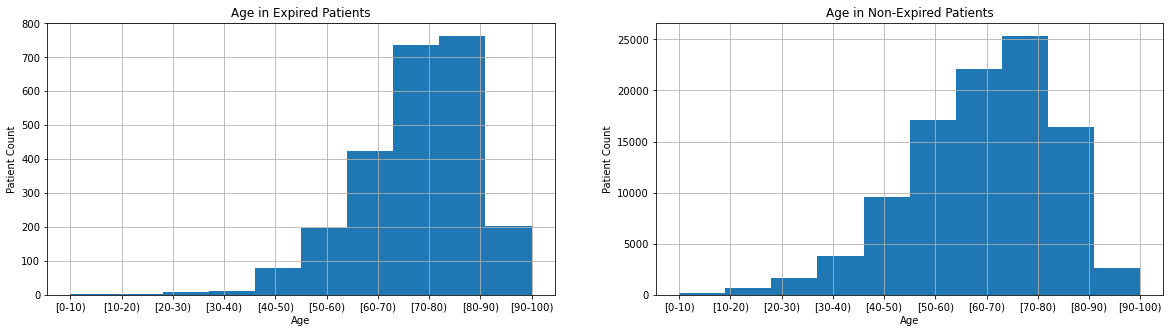

In [4]:
#First we will look at the 'Age' feature in the two data sets. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['age'].sort_values().hist(ax=ax1)
ax1.set_title('Age in Expired Patients')
ax1.set_xlabel('Age')
ax1.set_ylabel('Patient Count')

df_nonexpired['age'].sort_values().hist(ax=ax2)
ax2.set_title('Age in Non-Expired Patients')
ax2.set_xlabel('Age')
ax2.set_ylabel('Patient Count')
plt.show()

In [5]:
contingency_table = pd.crosstab(df_expired['age'], df_nonexpired['age'])


In [6]:
# Perform the chi-squared test and print the results
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic = {:.2f}".format(chi2))
print("p-value = {:.4f}".format(p))

Chi-squared statistic = 121.69
p-value = 0.0023



Age distribution in the expired patients seems to more heavily skewed to the population of 70-90s.

In [7]:
#Now we will look at Weight between the two populations.  First we have to summarize the information before we can graph it.

df_expiredWeight = df_expired['weight'].value_counts().reset_index()
df_expiredWeight = df_expiredWeight.rename(columns={'index': 'weight', 'weight': 'count'})

df_nonexpiredWeight = df_nonexpired['weight'].value_counts().reset_index()
df_nonexpiredWeight = df_nonexpiredWeight.rename(columns={'index': 'weight', 'weight': 'Count'})


df_expiredWeight = df_expiredWeight.reset_index(drop=True)
df_nonexpiredWeight = df_nonexpiredWeight.reset_index(drop=True)

df_expiredWeight = df_expiredWeight.sort_values(by='weight')
df_nonexpiredWeight = df_nonexpiredWeight.sort_values(by='weight')



Text(0, 0.5, 'Pt count')

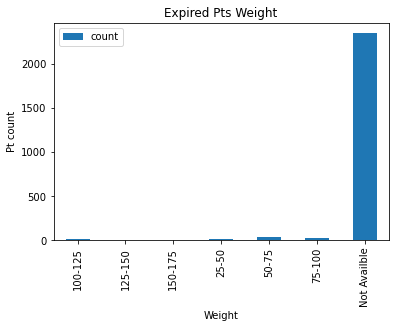

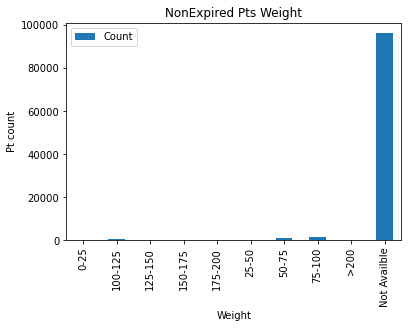

In [8]:
df_expiredWeight.plot(kind='bar', x='weight')
plt.title('Expired Pts Weight')
plt.xlabel('Weight')
plt.ylabel('Pt count')

df_nonexpiredWeight.plot(kind='bar', x='weight')
plt.title('NonExpired Pts Weight')
plt.xlabel('Weight')
plt.ylabel('Pt count')

As we can see the data for Weight is insufficent and will not add any value in descerning between the two populations.  Thus this feature will not be used. 

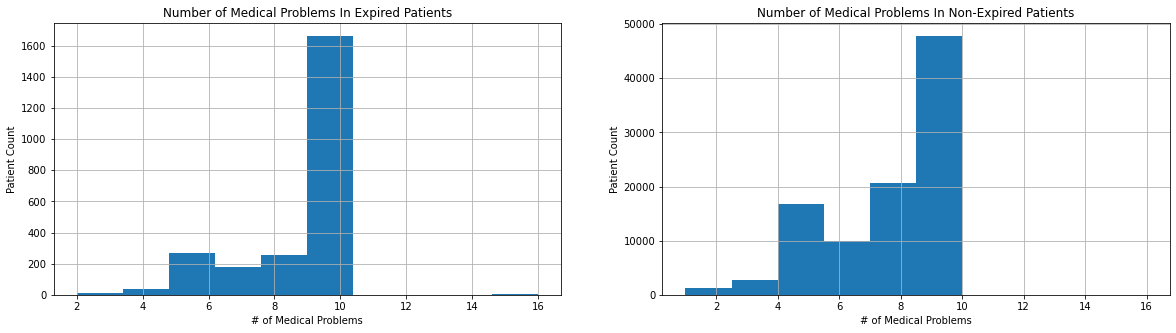

In [9]:
#Now lets look at the number of medical problems each pt has between the two populations. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['number_diagnoses'].hist(ax=ax1)
ax1.set_title('Number of Medical Problems In Expired Patients')
ax1.set_xlabel('# of Medical Problems')
ax1.set_ylabel('Patient Count')

df_nonexpired['number_diagnoses'].hist(ax=ax2)
ax2.set_title('Number of Medical Problems In Non-Expired Patients')
ax2.set_xlabel('# of Medical Problems')
ax2.set_ylabel('Patient Count')
plt.show()

In [10]:
#Lets calculate t-test and p-value to determine if there is a statistical signifcant difference between the two populations.
t_value, p_value = stats.ttest_ind(df_nonexpired['number_diagnoses'], df_expired['number_diagnoses'])
print("# of Diagnosis: t-value = {:.2f}, p-value = {:.2f}".format(t_value, p_value))

# of Diagnosis: t-value = -22.10, p-value = 0.00


P-value is less than .05 shows that there is a significant differences between number of medical problems between the two populations.  This is a feature that will be used during machine learning.  Expired patients do seem to have higher number of medical problems.  This is to be expected. 

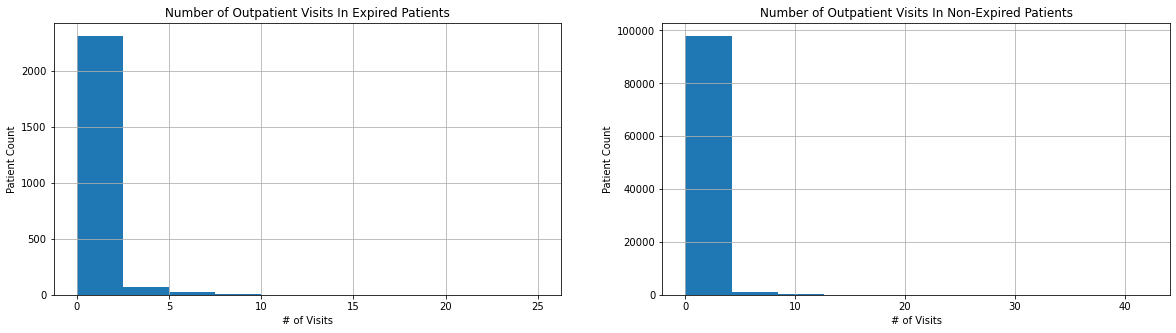

In [11]:
#Graph number_outpatient

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['number_outpatient'].hist(ax=ax1)
ax1.set_title('Number of Outpatient Visits In Expired Patients')
ax1.set_xlabel('# of Visits')
ax1.set_ylabel('Patient Count')


df_nonexpired['number_outpatient'].hist(ax=ax2)
ax2.set_title('Number of Outpatient Visits In Non-Expired Patients')
ax2.set_xlabel('# of Visits')
ax2.set_ylabel('Patient Count')
plt.show()

In [12]:
#Perform t-test and p-value on above.
t_value, p_value = stats.ttest_ind(df_nonexpired['number_outpatient'], df_expired['number_outpatient'])
print("# of Outpatient: t-value = {:.2f}, p-value = {:.2f}".format(t_value, p_value))

# of Outpatient: t-value = -0.19, p-value = 0.85


No signifcant difference between number of outpatient visits between expired and non-expired pts. 

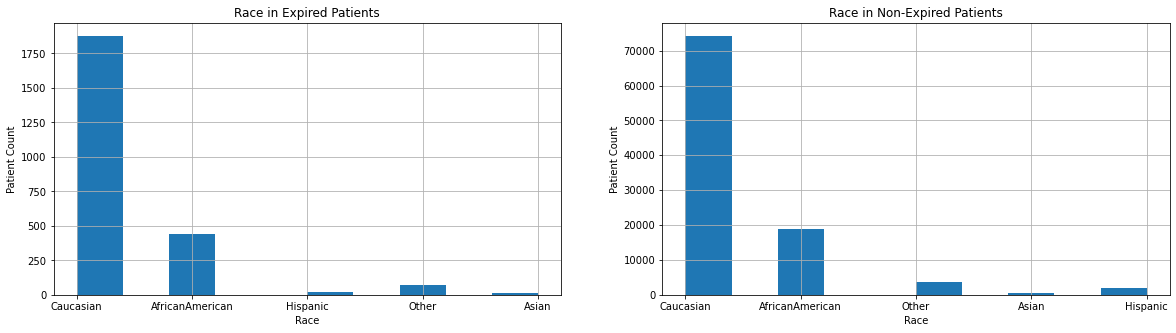

In [13]:
# Graph 'Race' feature
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['race'].hist(ax=ax1)
ax1.set_title('Race in Expired Patients')
ax1.set_xlabel('Race')
ax1.set_ylabel('Patient Count')

df_nonexpired['race'].hist(ax=ax2)
ax2.set_title('Race in Non-Expired Patients')
ax2.set_xlabel('Race')
ax2.set_ylabel('Patient Count')
plt.show()

In [14]:
contingency_table = pd.crosstab(df_expired['race'], df_nonexpired['race'])


In [15]:
# Perform the chi-squared test and print the results
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic = {:.2f}".format(chi2))
print("p-value = {:.4f}".format(p))

Chi-squared statistic = 14.94
p-value = 0.5287


Race does not seem to be a factor of the total dataset compared to expired patients.

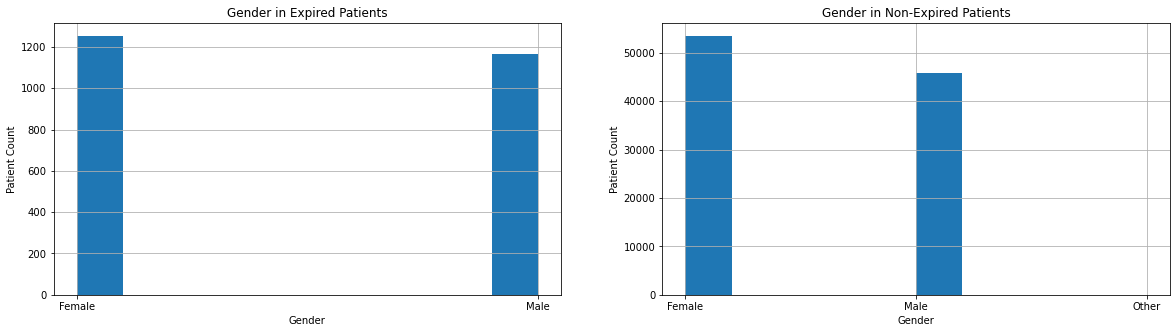

In [16]:
# Gender feature
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['gender'].sort_values().hist(ax=ax1)
ax1.set_title('Gender in Expired Patients')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Patient Count')

df_nonexpired['gender'].sort_values().hist(ax=ax2)
ax2.set_title('Gender in Non-Expired Patients')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Patient Count')
plt.show()

In [17]:
contingency_table = pd.crosstab(df_expired['gender'], df_nonexpired['gender'])


In [18]:
# Perform the chi-squared test and print the results
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic = {:.2f}".format(chi2))
print("p-value = {:.4f}".format(p))

Chi-squared statistic = 0.00
p-value = 1.0000


Gender seems to be equal between the two populations. 

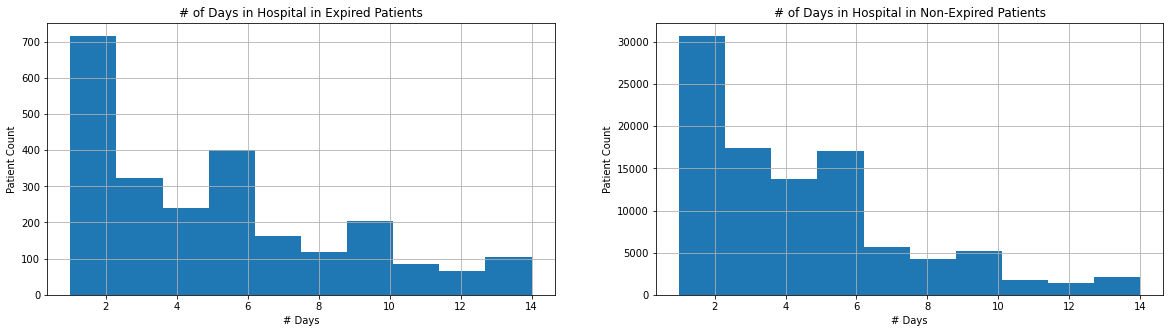

In [19]:
#Time in hospital Graph. 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['time_in_hospital'].hist(ax=ax1)
ax1.set_title('# of Days in Hospital in Expired Patients')
ax1.set_xlabel('# Days')
ax1.set_ylabel('Patient Count')

df_nonexpired['time_in_hospital'].hist(ax=ax2)
ax2.set_title('# of Days in Hospital in Non-Expired Patients')
ax2.set_xlabel('# Days')
ax2.set_ylabel('Patient Count')
plt.show()

In [20]:
#Perform t-test and p-value on above. 
t_value, p_value = stats.ttest_ind(df_nonexpired['time_in_hospital'], df_expired['time_in_hospital'])
print("Length of Hospital stay: t-value = {:.2f}, p-value = {:.2f}".format(t_value, p_value))
print('Mean Non-expired:',df_nonexpired['time_in_hospital'].mean(),'Mean expired:',df_expired['time_in_hospital'].mean())

Length of Hospital stay: t-value = -11.41, p-value = 0.00
Mean Non-expired: 4.3793346419044745 Mean expired: 5.079306071871128


There is a statistical difference between the Length of Stay in the hospital between the two patient populations.   Avg time expired patients were in hospital was longer than those who did not die. 

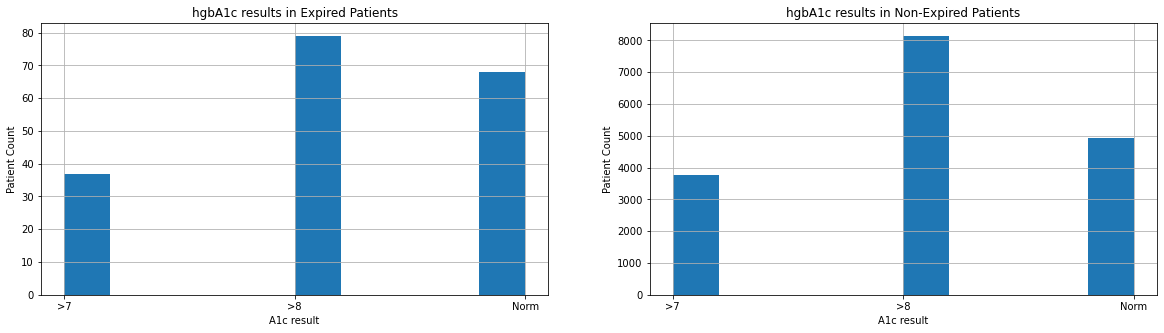

In [21]:
#Graph Hemogloblin A1c results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['A1Cresult'].sort_values().hist(ax=ax1)
ax1.set_title('hgbA1c results in Expired Patients')
ax1.set_xlabel('A1c result')
ax1.set_ylabel('Patient Count')

df_nonexpired['A1Cresult'].sort_values().hist(ax=ax2)
ax2.set_title('hgbA1c results in Non-Expired Patients')
ax2.set_xlabel('A1c result')
ax2.set_ylabel('Patient Count')
plt.show()

In [22]:
contingency_table = pd.crosstab(df_expired['A1Cresult'], df_nonexpired['A1Cresult'])

In [23]:
# Perform the chi-squared test and print the results
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic = {:.2f}".format(chi2))
print("p-value = {:.4f}".format(p))

Chi-squared statistic = 3.18
p-value = 0.5283


Most of the data for A1c was 'Not Available'.  In the above data that is present, their does not seem to be much difference between the two populations.

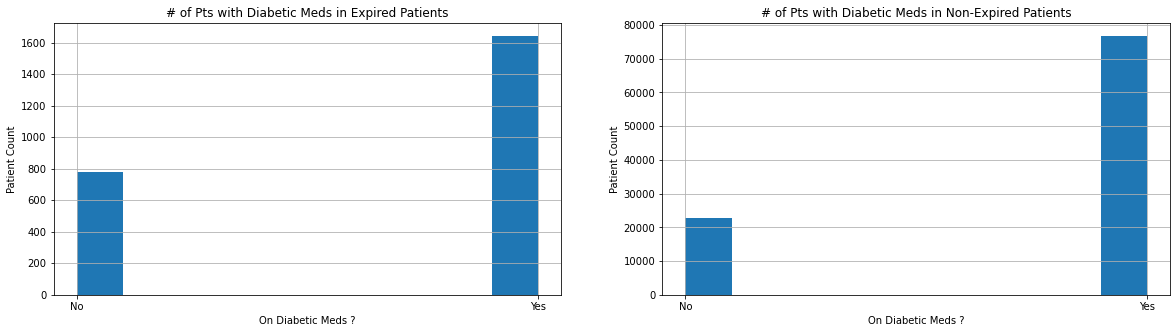

In [24]:
#Are the patient's on Diabetes Medications?
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['diabetesMed'].sort_values().hist(ax=ax1)
ax1.set_title('# of Pts with Diabetic Meds in Expired Patients')
ax1.set_xlabel('On Diabetic Meds ?')
ax1.set_ylabel('Patient Count')

df_nonexpired['diabetesMed'].sort_values().hist(ax=ax2)
ax2.set_title('# of Pts with Diabetic Meds in Non-Expired Patients')
ax2.set_xlabel('On Diabetic Meds ?')
ax2.set_ylabel('Patient Count')
plt.show()

In [25]:
contingency_table = pd.crosstab(df_expired['diabetesMed'], df_nonexpired['diabetesMed'])

In [26]:
# Perform the chi-squared test and print the results
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic = {:.2f}".format(chi2))
print("p-value = {:.4f}".format(p))

Chi-squared statistic = 3.37
p-value = 0.0664


Seemes to be proportionate amount between Yes/No amongst the two populations. 

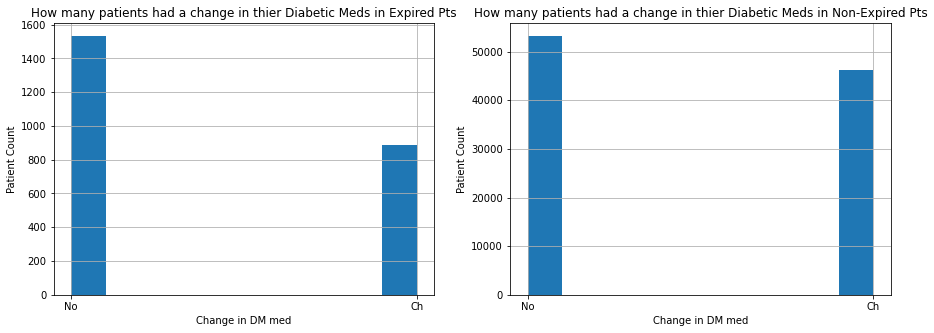

In [27]:
#How Many Patient's had a change in thier medications?
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

df_expired['change'].hist(ax=ax1)
ax1.set_title('How many patients had a change in thier Diabetic Meds in Expired Pts')
ax1.set_xlabel('Change in DM med')
ax1.set_ylabel('Patient Count')

df_nonexpired['change'].hist(ax=ax2)
ax2.set_title('How many patients had a change in thier Diabetic Meds in Non-Expired Pts')
ax2.set_xlabel('Change in DM med')
ax2.set_ylabel('Patient Count')
plt.show()


In [28]:
contingency_table = pd.crosstab(df_expired['change'], df_nonexpired['change'])

In [29]:
# Perform the chi-squared test and print the results
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic = {:.2f}".format(chi2))
print("p-value = {:.4f}".format(p))

Chi-squared statistic = 3.63
p-value = 0.0567


Maybe slightly more patients in the non-expired group had a change in their DM medications. 

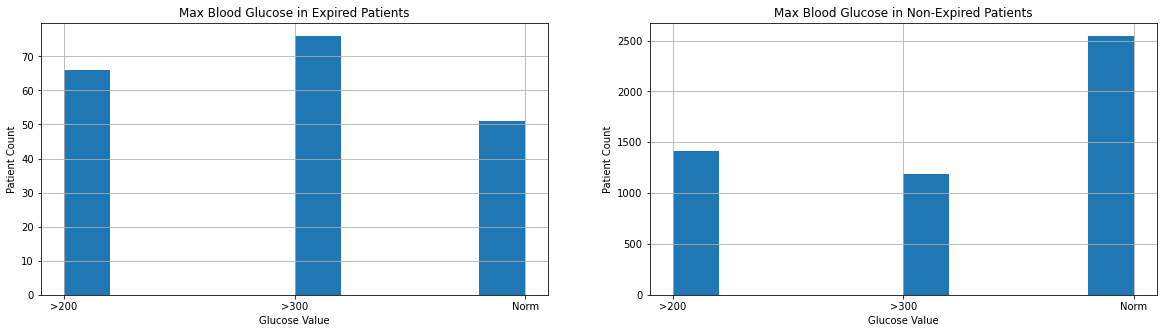

In [30]:
#Max blood sugar lab value.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['max_glu_serum'].sort_values().hist(ax=ax1)
ax1.set_title('Max Blood Glucose in Expired Patients')
ax1.set_xlabel('Glucose Value')
ax1.set_ylabel('Patient Count')

df_nonexpired['max_glu_serum'].sort_values().hist(ax=ax2)
ax2.set_title('Max Blood Glucose in Non-Expired Patients')
ax2.set_xlabel('Glucose Value')
ax2.set_ylabel('Patient Count')
plt.show()

In [31]:
contingency_table = pd.crosstab(df_expired['max_glu_serum'], df_nonexpired['max_glu_serum'])

In [32]:
# Perform the chi-squared test and print the results
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic = {:.2f}".format(chi2))
print("p-value = {:.4f}".format(p))

Chi-squared statistic = 2.99
p-value = 0.5592


Most of the data for this was 'NA'.  Difficult to draw any conclusions.  Patients in the expired group seem to have higher prominance of hyperglycemia compared to the Non-expired population.

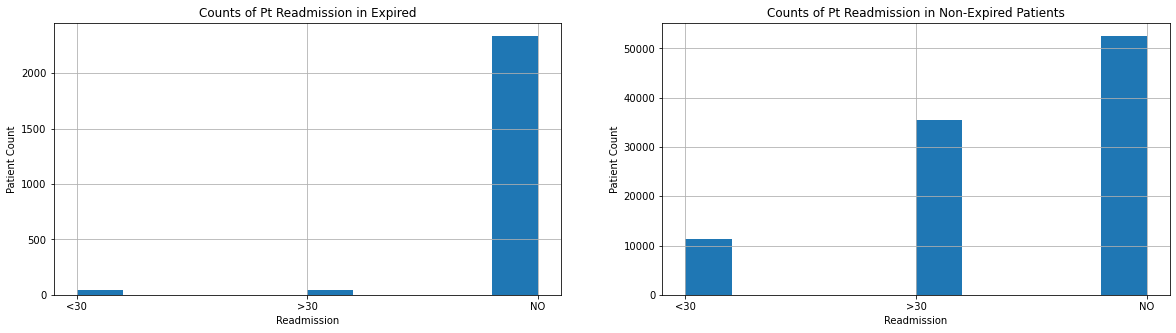

In [33]:
#Readmission data 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['readmitted'].sort_values().hist(ax=ax1)
ax1.set_title('Counts of Pt Readmission in Expired')
ax1.set_xlabel('Readmission')
ax1.set_ylabel('Patient Count')

df_nonexpired['readmitted'].sort_values().hist(ax=ax2)
ax2.set_title('Counts of Pt Readmission in Non-Expired Patients')
ax2.set_xlabel('Readmission')
ax2.set_ylabel('Patient Count')
plt.show()

In [34]:
contingency_table = pd.crosstab(df_expired['readmitted'], df_nonexpired['readmitted'])

In [35]:
# Perform the chi-squared test and print the results
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic = {:.2f}".format(chi2))
print("p-value = {:.4f}".format(p))

Chi-squared statistic = 1.59
p-value = 0.8097


It seems that there is no statiscal difference between the two datasets when looking at readmissions.

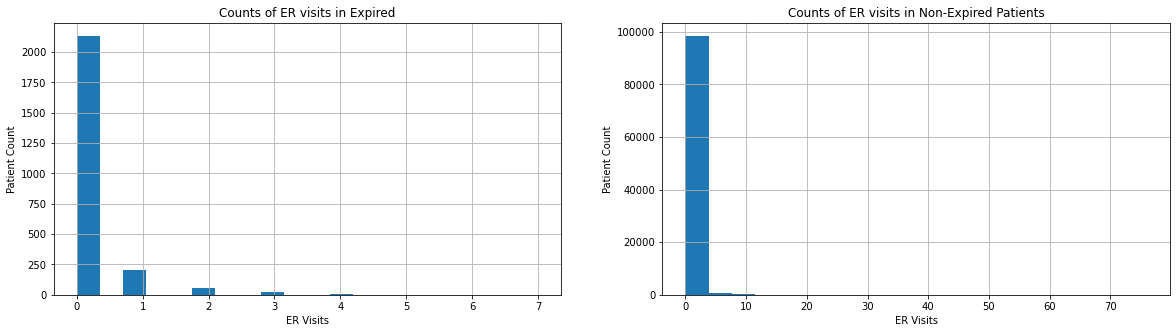

In [36]:
# Number of ER visits
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['number_emergency'].sort_values().hist(ax=ax1, bins=20)
ax1.set_title('Counts of ER visits in Expired')
ax1.set_xlabel('ER Visits')
ax1.set_ylabel('Patient Count')

df_nonexpired['number_emergency'].sort_values().hist(ax=ax2, bins=20)
ax2.set_title('Counts of ER visits in Non-Expired Patients')
ax2.set_xlabel('ER Visits')
ax2.set_ylabel('Patient Count')
plt.show()

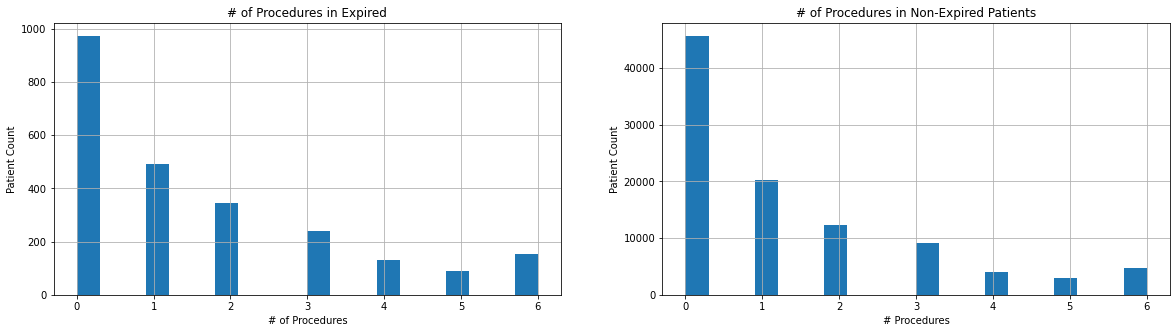

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['num_procedures'].hist(ax=ax1, bins=20)
ax1.set_title('# of Procedures in Expired')
ax1.set_xlabel('# of Procedures')
ax1.set_ylabel('Patient Count')

df_nonexpired['num_procedures'].hist(ax=ax2, bins=20)
ax2.set_title('# of Procedures in Non-Expired Patients')
ax2.set_xlabel('# Procedures')
ax2.set_ylabel('Patient Count')
plt.show()

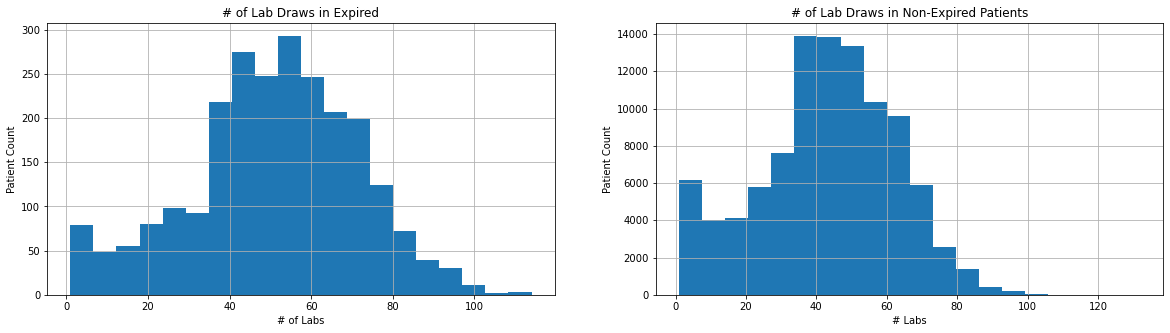

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['num_lab_procedures'].hist(ax=ax1, bins=20)
ax1.set_title('# of Lab Draws in Expired')
ax1.set_xlabel('# of Labs')
ax1.set_ylabel('Patient Count')

df_nonexpired['num_lab_procedures'].hist(ax=ax2, bins=20)
ax2.set_title('# of Lab Draws in Non-Expired Patients')
ax2.set_xlabel('# Labs')
ax2.set_ylabel('Patient Count')
plt.show()

In [39]:
#Let's calculate t-test, p- value for the above 3 features. 
features_list = ['num_lab_procedures','num_procedures','number_emergency']
for feature in features_list:
    t_value, p_value = stats.ttest_ind(df_nonexpired[feature], df_expired[feature], equal_var=False)
    print("{}: t-value = {:.2f}, p-value = {:.2f}".format(feature, t_value, p_value))
    print('Mean Non-expired:',df_nonexpired[feature].mean(),'Mean expired:',df_expired[feature].mean())

num_lab_procedures: t-value = -18.65, p-value = 0.00
Mean Non-expired: 42.90677940510343 Mean expired: 50.84551838083436
num_procedures: t-value = -6.21, p-value = 0.00
Mean Non-expired: 1.3342292012683075 Mean expired: 1.5654688145394464
number_emergency: t-value = 2.21, p-value = 0.03
Mean Non-expired: 0.19844984649453923 Mean expired: 0.17265592730276746


Expired patients it seems do have significantly more lab draws and procedures compared to non-expired. It also appears that Non-Expired patients have more Er visits. You would think that the sickest patients and most likely to die would have more ER visits.  

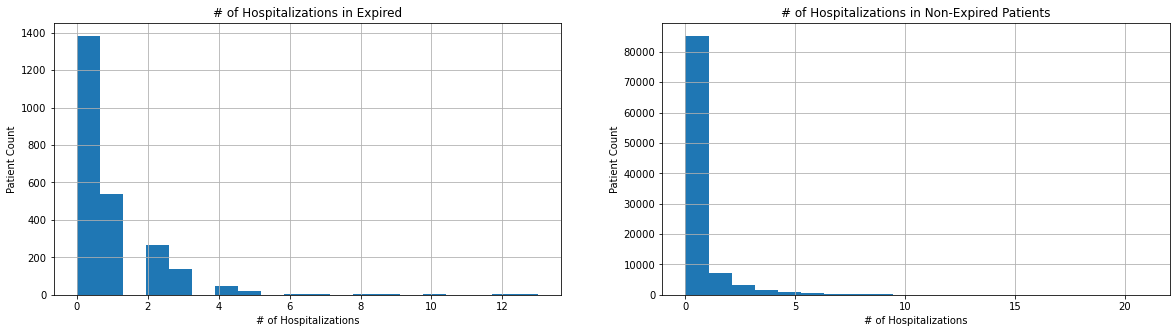

In [40]:
#number_inpatient

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['number_inpatient'].hist(ax=ax1, bins=20)
ax1.set_title('# of Hospitalizations in Expired')
ax1.set_xlabel('# of Hospitalizations')
ax1.set_ylabel('Patient Count')

df_nonexpired['number_inpatient'].hist(ax=ax2, bins=20)
ax2.set_title('# of Hospitalizations in Non-Expired Patients')
ax2.set_xlabel('# of Hospitalizations')
ax2.set_ylabel('Patient Count')
plt.show()

In [41]:
#Let's calculate t-test, p- value for Number of Hospital(inpatient) visits
t_value, p_value = stats.ttest_ind(df_nonexpired['number_inpatient'], df_expired['number_inpatient'], equal_var=False)
print("# of Inpatient: t-value = {:.2f}, p-value = {:.2f}".format(t_value, p_value))
print('Mean Non-expired:',df_nonexpired['number_inpatient'].mean(),'Mean expired:',df_expired['number_inpatient'].mean())

# of Inpatient: t-value = -7.06, p-value = 0.00
Mean Non-expired: 0.6309225426543862 Mean expired: 0.8261049153242461


Well it seems that there is a significant difference.  It appears that Expired patients have more hospital admissions compared to the non expired population.  This makes sense.

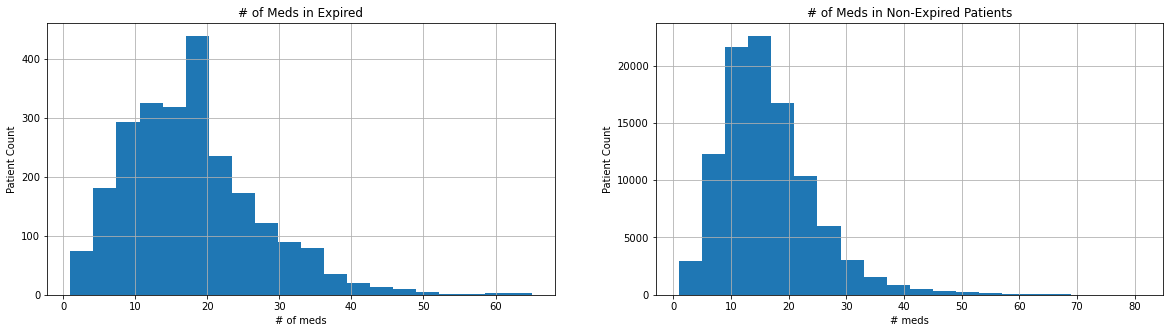

In [42]:
# Number of Medications between the two groups:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['num_medications'].hist(ax=ax1, bins=20)
ax1.set_title('# of Meds in Expired')
ax1.set_xlabel('# of meds')
ax1.set_ylabel('Patient Count')

df_nonexpired['num_medications'].hist(ax=ax2, bins=20)
ax2.set_title('# of Meds in Non-Expired Patients')
ax2.set_xlabel('# meds')
ax2.set_ylabel('Patient Count')
plt.show()

In [43]:
# Calc statistics
t_value, p_value = stats.ttest_ind(df_nonexpired['num_medications'], df_expired['num_medications'],equal_var=False)
print("# of Meds Sample: t-value = {:.2f}, p-value = {:.2f}".format(t_value, p_value))
print('Mean Non-expired:',df_nonexpired['num_medications'].mean(),'Mean expired:',df_expired['num_medications'].mean())

# of Meds Sample: t-value = -9.51, p-value = 0.00
Mean Non-expired: 15.979123257335548 Mean expired: 17.774886410574144


It appears that the Expired group has a statistically signficant number of more medications compared to the non-expired group.

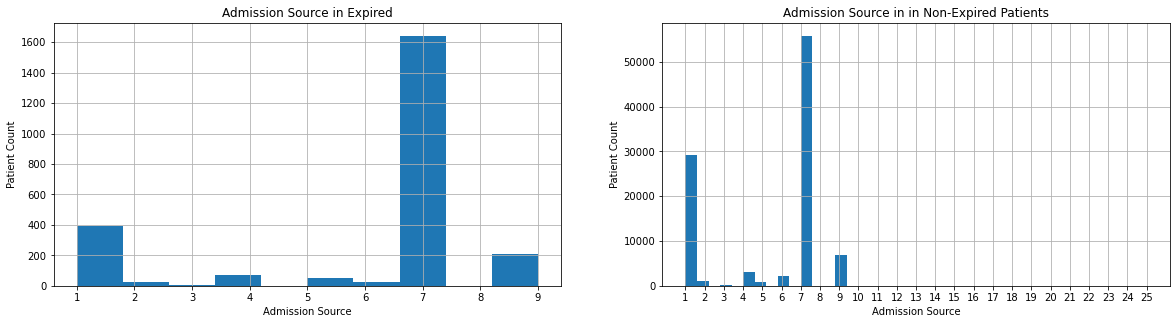

In [44]:
#admission_source_description
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['admission_source_id'].hist(ax=ax1, bins=10)
ax1.set_title('Admission Source in Expired')
ax1.set_xlabel('Admission Source')
ax1.set_ylabel('Patient Count')

df_nonexpired['admission_source_id'].hist(ax=ax2, bins=40)
ax2.set_title('Admission Source in in Non-Expired Patients')
ax2.set_xlabel('Admission Source')
ax2.set_ylabel('Patient Count')
plt.xticks((np.linspace(df_nonexpired['admission_source_id'].min(), df_nonexpired['admission_source_id'].max(), num=25)))
plt.subplots_adjust(bottom=0.15)
plt.show()

In [45]:
t_value, p_value = stats.ttest_ind(df_nonexpired['admission_source_id'], df_expired['admission_source_id'],equal_var=False)
print("Admission Source ID Sample: t-value = {:.2f}, p-value = {:.2f}".format(t_value, p_value))
print('Mean Non-expired:',df_nonexpired['admission_source_id'].mean(),
'Mean Expired:',df_expired['admission_source_id'].mean())

Admission Source ID Sample: t-value = -16.45, p-value = 0.00
Mean Non-expired: 5.184397805626856 Mean Expired: 6.007021891780256


It seems as though most of the Expired patients came through the Er where as the Non expired group came through via Er AND Physician and Clinical Referral. 

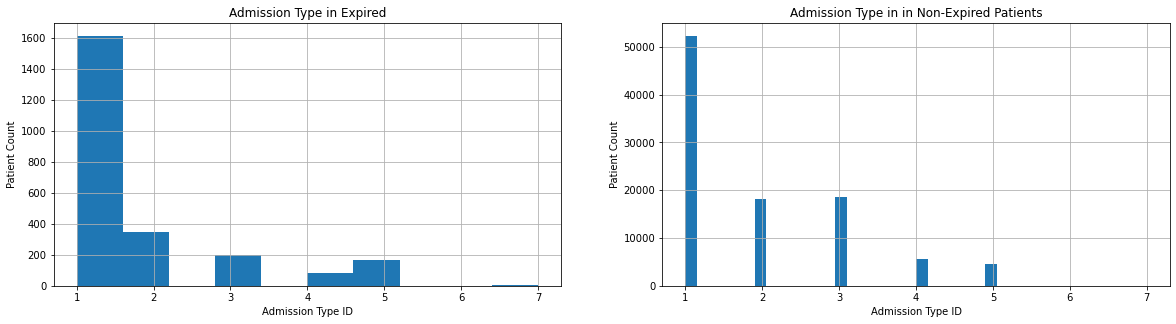

In [46]:
#admission_type_description

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

df_expired['admission_type_id'].hist(ax=ax1, bins=10)
ax1.set_title('Admission Type in Expired')
ax1.set_xlabel('Admission Type ID')
ax1.set_ylabel('Patient Count')

df_nonexpired['admission_type_id'].hist(ax=ax2, bins=40)
ax2.set_title('Admission Type in in Non-Expired Patients')
ax2.set_xlabel('Admission Type ID')
ax2.set_ylabel('Patient Count')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [47]:
t_value, p_value = stats.ttest_ind(df_nonexpired['admission_type_id'], df_expired['admission_type_id'],equal_var=False)

print("t-value: ", t_value)
print("p-value: ", p_value)
print("Admission Type ID Sample: t-value = {:.2f}, p-value = {:.2f}".format(t_value, p_value))
print('Mean Non-expired:',df_nonexpired['admission_type_id'].mean(),
'Mean Expired:',df_expired['admission_type_id'].mean())

t-value:  8.67413241427338
p-value:  7.316406542379768e-18
Admission Type ID Sample: t-value = 8.67, p-value = 0.00
Mean Non-expired: 1.9125572499874175 Mean Expired: 1.6976456009913259


Most of the admissions for Expired patients were 'Emergency' or 'Urgent'.  

In [48]:
#Create list of freq count of how many patients are using these medications.
meds =['metformin','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']
ExpiredMedCount=[]
for i in meds:
    drugname = i
    drugname= ''+drugname+''
    nocount = df_expired[drugname].value_counts().iloc[0]
    yescount = 2421 - nocount
    ExpiredMedCount.append({drugname: yescount})

In [49]:
NonExpiredMedCount=[]
for i in meds:
    drugname = i
    drugname= ''+drugname+''
    nocount = df_nonexpired[drugname].value_counts().iloc[0]
    yescount = 99345 - nocount
    NonExpiredMedCount.append({drugname: yescount})

In [50]:
#Create DataFrame of Medication and Pt count
dfMedExpired = pd.DataFrame.from_dict({list(d.keys())[0]: list(d.values())[0] for d in ExpiredMedCount}, orient='index', columns=['count'])
dfMedExpired.index.name = 'medication'

dfMedNonExpired = pd.DataFrame.from_dict({list(d.keys())[0]: list(d.values())[0] for d in NonExpiredMedCount}, orient='index', columns=['count'])
dfMedNonExpired.index.name = 'medication'

In [51]:
dfMedNonExpired['count'] = dfMedNonExpired['count'].astype(int)
dfMedExpired['count'] = dfMedExpired['count'].astype(int)

Text(0, 0.5, 'Pt count')

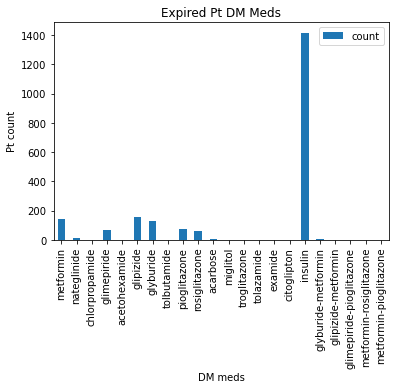

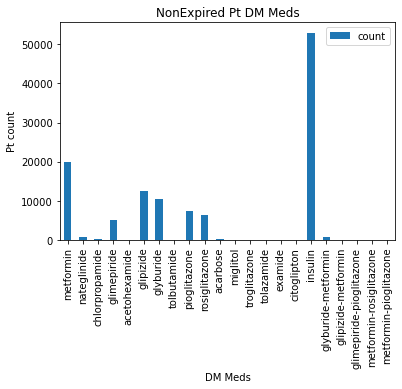

In [52]:
#Create Bar Graph of Medication Freq in Patients
dfMedExpired.plot(kind='bar')
plt.title('Expired Pt DM Meds')
plt.xlabel('DM meds')
plt.ylabel('Pt count')

dfMedNonExpired.plot(kind='bar')
plt.title('NonExpired Pt DM Meds')
plt.xlabel('DM Meds')
plt.ylabel('Pt count')

In [53]:
observed = dfMedExpired

pop_ratios = dfMedNonExpired/len(dfMedNonExpired)  # Get population ratios

expected = pop_ratios * len(dfMedExpired)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

count    112344.232369
dtype: float64


In [54]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 21)
print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=21)
print("P value")
print(p_value)

Critical value
32.670573340917315
P value
[0.]


There is a difference between type of medications used between the two populations.

In [55]:
#diag 1 in Expired pop.
diag1_counts_exp =df_expired['diag_1'].value_counts().rename_axis('icd9_expired').reset_index(name='count')


In [56]:
#diag 1 in Nonexpired pop.
diag1_counts_reg =df_nonexpired['diag_1'].value_counts().rename_axis('icd9_nonexpired').reset_index(name='count')


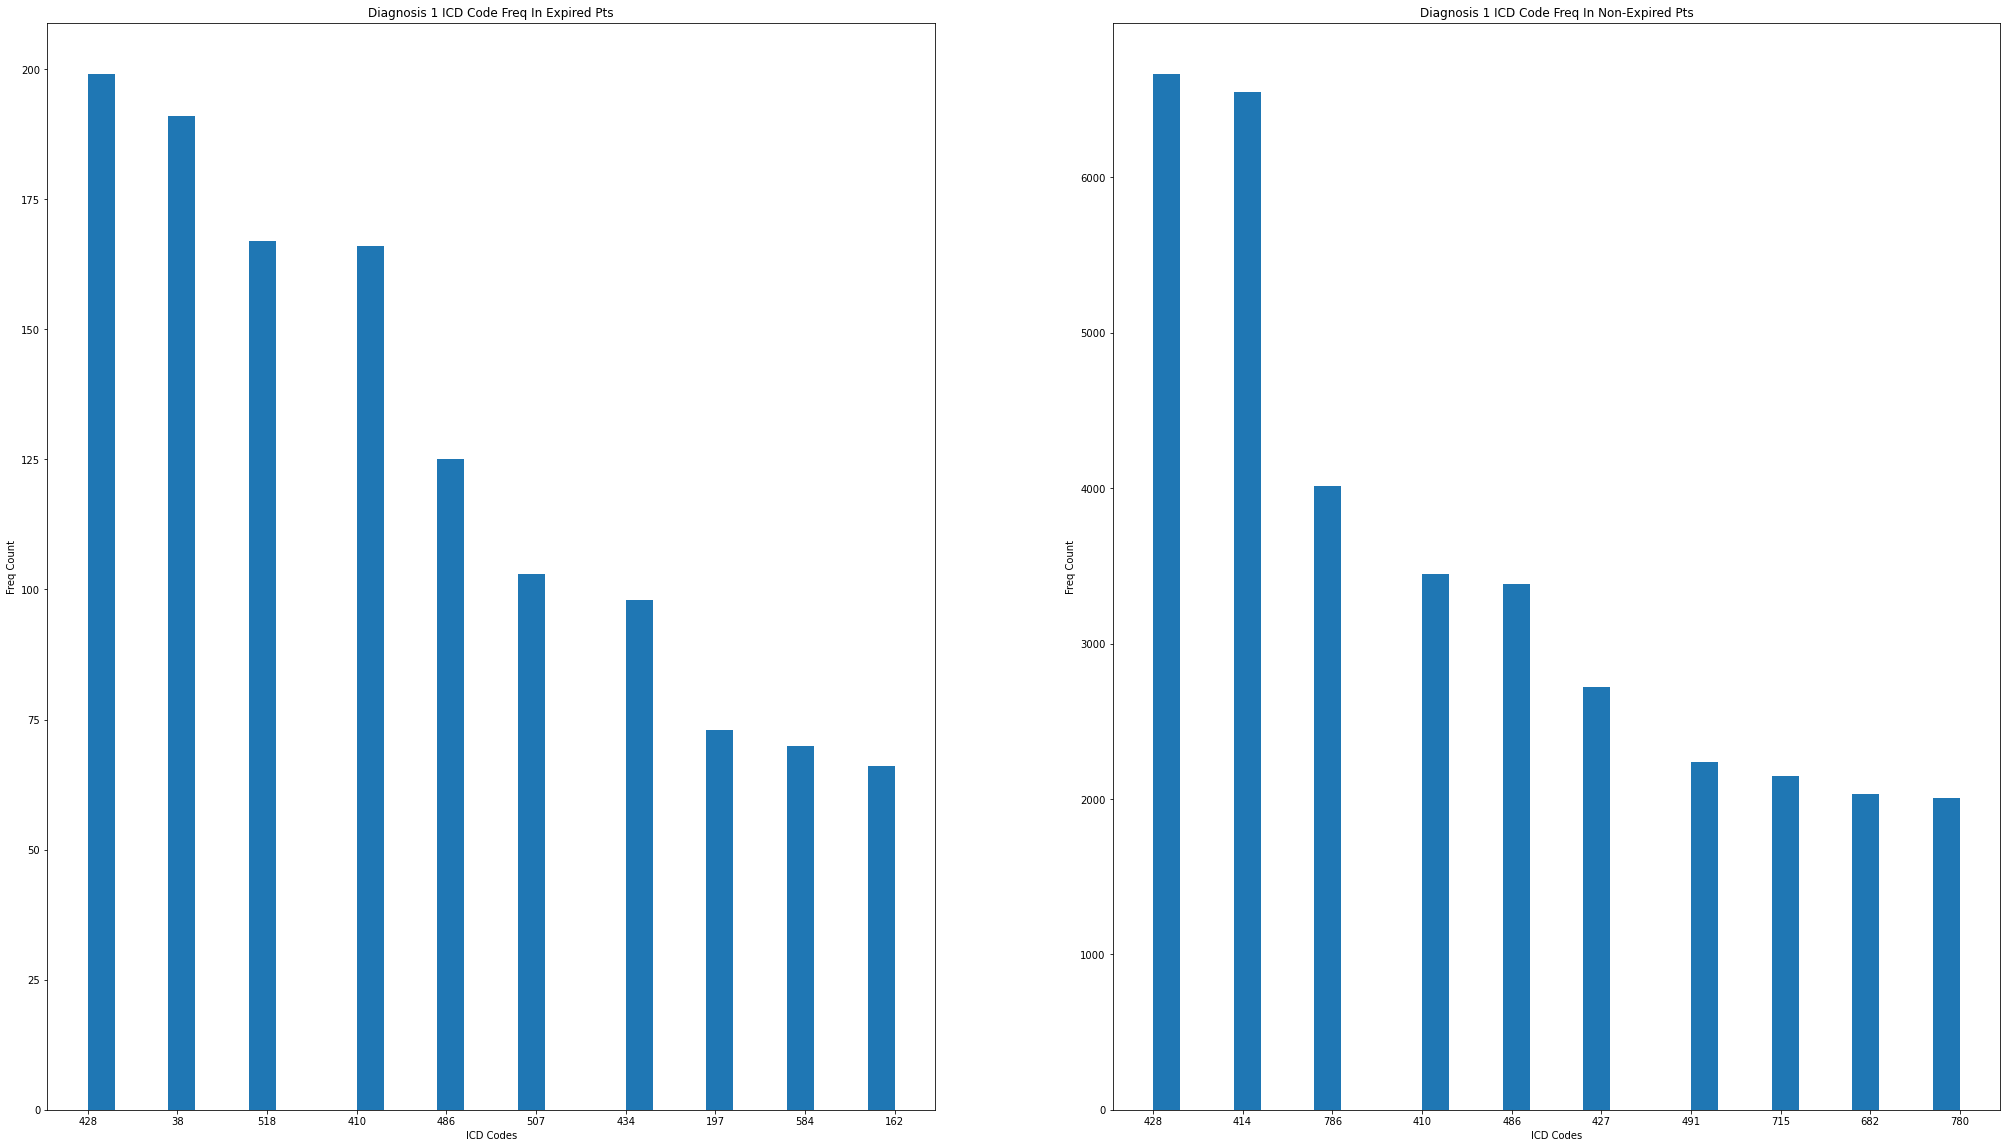

In [57]:
# Define the figure and create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(35, 20))

# Plot the first histogram on the first subplot
ax1.hist(diag1_counts_exp['icd9_expired'].head(10), weights=diag1_counts_exp['count'].head(10), bins=30)
ax1.set_title('Diagnosis 1 ICD Code Freq In Expired Pts')
ax1.set_xlabel('ICD Codes')
ax1.set_ylabel('Freq Count')

# Plot the second histogram on the second subplot
ax2.hist(diag1_counts_reg['icd9_nonexpired'].head(10), weights=diag1_counts_reg['count'].head(10), bins=30)
ax2.set_title('Diagnosis 1 ICD Code Freq In Non-Expired Pts')
ax2.set_xlabel('ICD Codes')
ax2.set_ylabel('Freq Count')

# Show the figure
plt.show()

In [58]:
#Concat both tables
diag1_concat = pd.concat([diag1_counts_reg, diag1_counts_exp], axis=1)
print(diag1_concat.head(20))

   icd9_nonexpired  count icd9_expired  count
0              428   6663          428  199.0
1              414   6550           38  191.0
2              786   4015          518  167.0
3              410   3448          410  166.0
4              486   3383          486  125.0
5              427   2720          507  103.0
6              491   2240          434   98.0
7              715   2147          197   73.0
8              682   2029          584   70.0
9              780   2004          162   66.0
10             996   1937          276   50.0
11             434   1930          431   46.0
12             276   1839          427   46.0
13           250.8   1655          491   35.0
14             599   1564          198   34.0
15              38   1497          599   31.0
16             584   1450          414   31.0
17             V57   1200          996   30.0
18           250.6   1177        250.8   25.0
19             820   1069          415   22.0


As can be seen there are different diagnosis for the expired and non expired for diagnosis 1 feature.

In [59]:
#Diag 2 Top Ten Count ICD codes
diag2_counts_exp =df_expired['diag_2'].value_counts().rename_axis('icd9_expired').reset_index(name='count')
diag2_counts_reg =df_nonexpired['diag_2'].value_counts().rename_axis('icd9_nonexpired').reset_index(name='count')


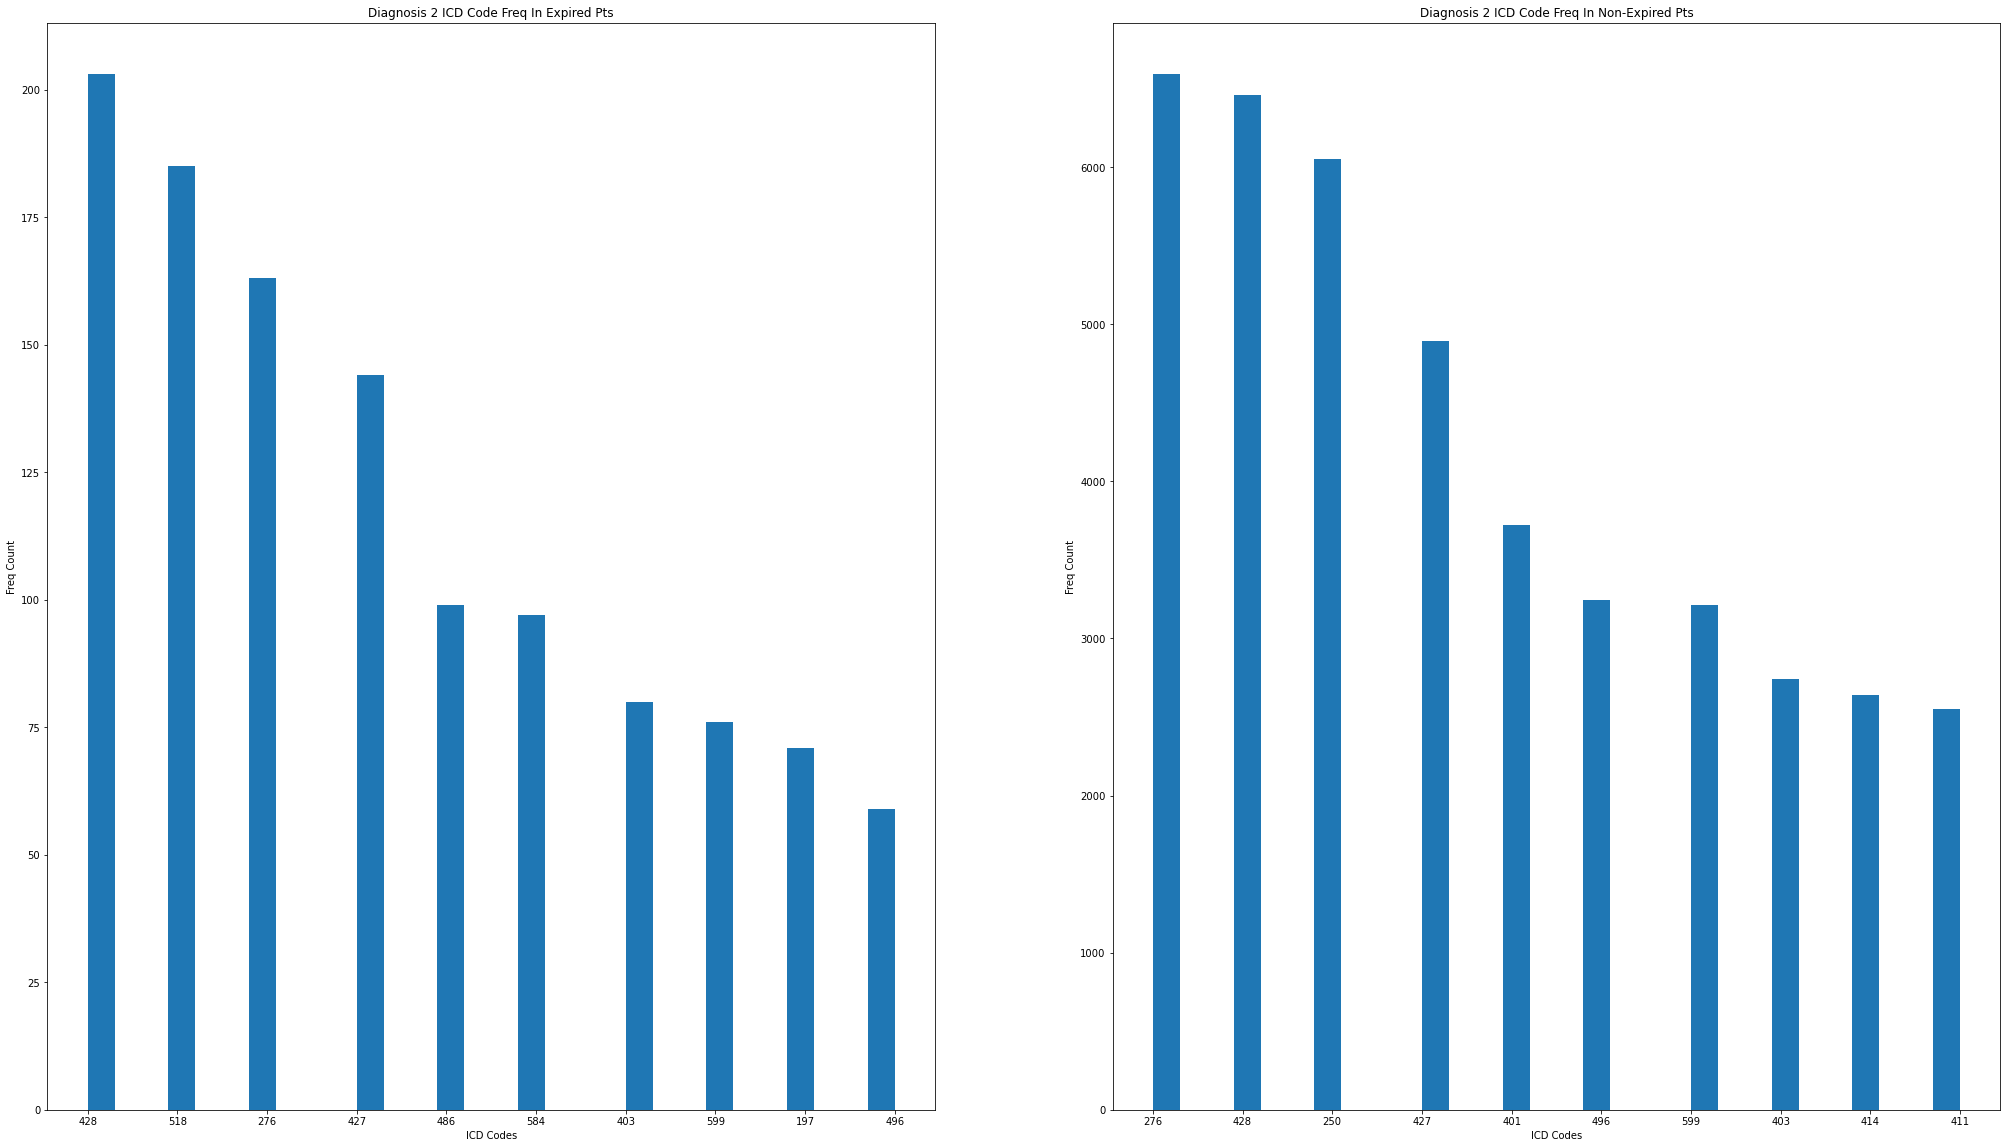

In [60]:
# Define the figure and create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(35, 20))

# Plot the first histogram on the first subplot
ax1.hist(diag2_counts_exp['icd9_expired'].head(10), weights=diag2_counts_exp['count'].head(10), bins=30)
ax1.set_title('Diagnosis 2 ICD Code Freq In Expired Pts')
ax1.set_xlabel('ICD Codes')
ax1.set_ylabel('Freq Count')

# Plot the second histogram on the second subplot
ax2.hist(diag2_counts_reg['icd9_nonexpired'].head(10), weights=diag2_counts_reg['count'].head(10), bins=30)
ax2.set_title('Diagnosis 2 ICD Code Freq In Non-Expired Pts')
ax2.set_xlabel('ICD Codes')
ax2.set_ylabel('Freq Count')

# Show the figure
plt.show()

In [61]:
#Concat both tables
diag2_concat = pd.concat([diag2_counts_reg, diag2_counts_exp], axis=1)
print(diag2_concat.head(20))

   icd9_nonexpired  count icd9_expired  count
0              276   6589          428  203.0
1              428   6459          518  185.0
2              250   6051          276  163.0
3              427   4892          427  144.0
4              401   3722          486   99.0
5              496   3246          584   97.0
6              599   3212          403   80.0
7              403   2743          599   76.0
8              414   2642          197   71.0
9              411   2551          496   59.0
10          250.02   2054          162   55.0
11             707   1952           38   54.0
12             585   1822          491   53.0
13             584   1552          585   49.0
14          250.01   1516          707   47.0
15             285   1507          507   47.0
16             491   1492          785   45.0
17             780   1456          410   44.0
18             682   1422          425   36.0
19             425   1398          780   35.0


Diagnosis 2 codes are different between the Expired and Non-Expired.

In [62]:
#Diag 3 Top Ten Count ICD codes
diag3_counts_exp =df_expired['diag_3'].value_counts().rename_axis('icd9_expired').reset_index(name='count')
diag3_counts_reg =df_nonexpired['diag_3'].value_counts().rename_axis('icd9_nonexpired').reset_index(name='count')


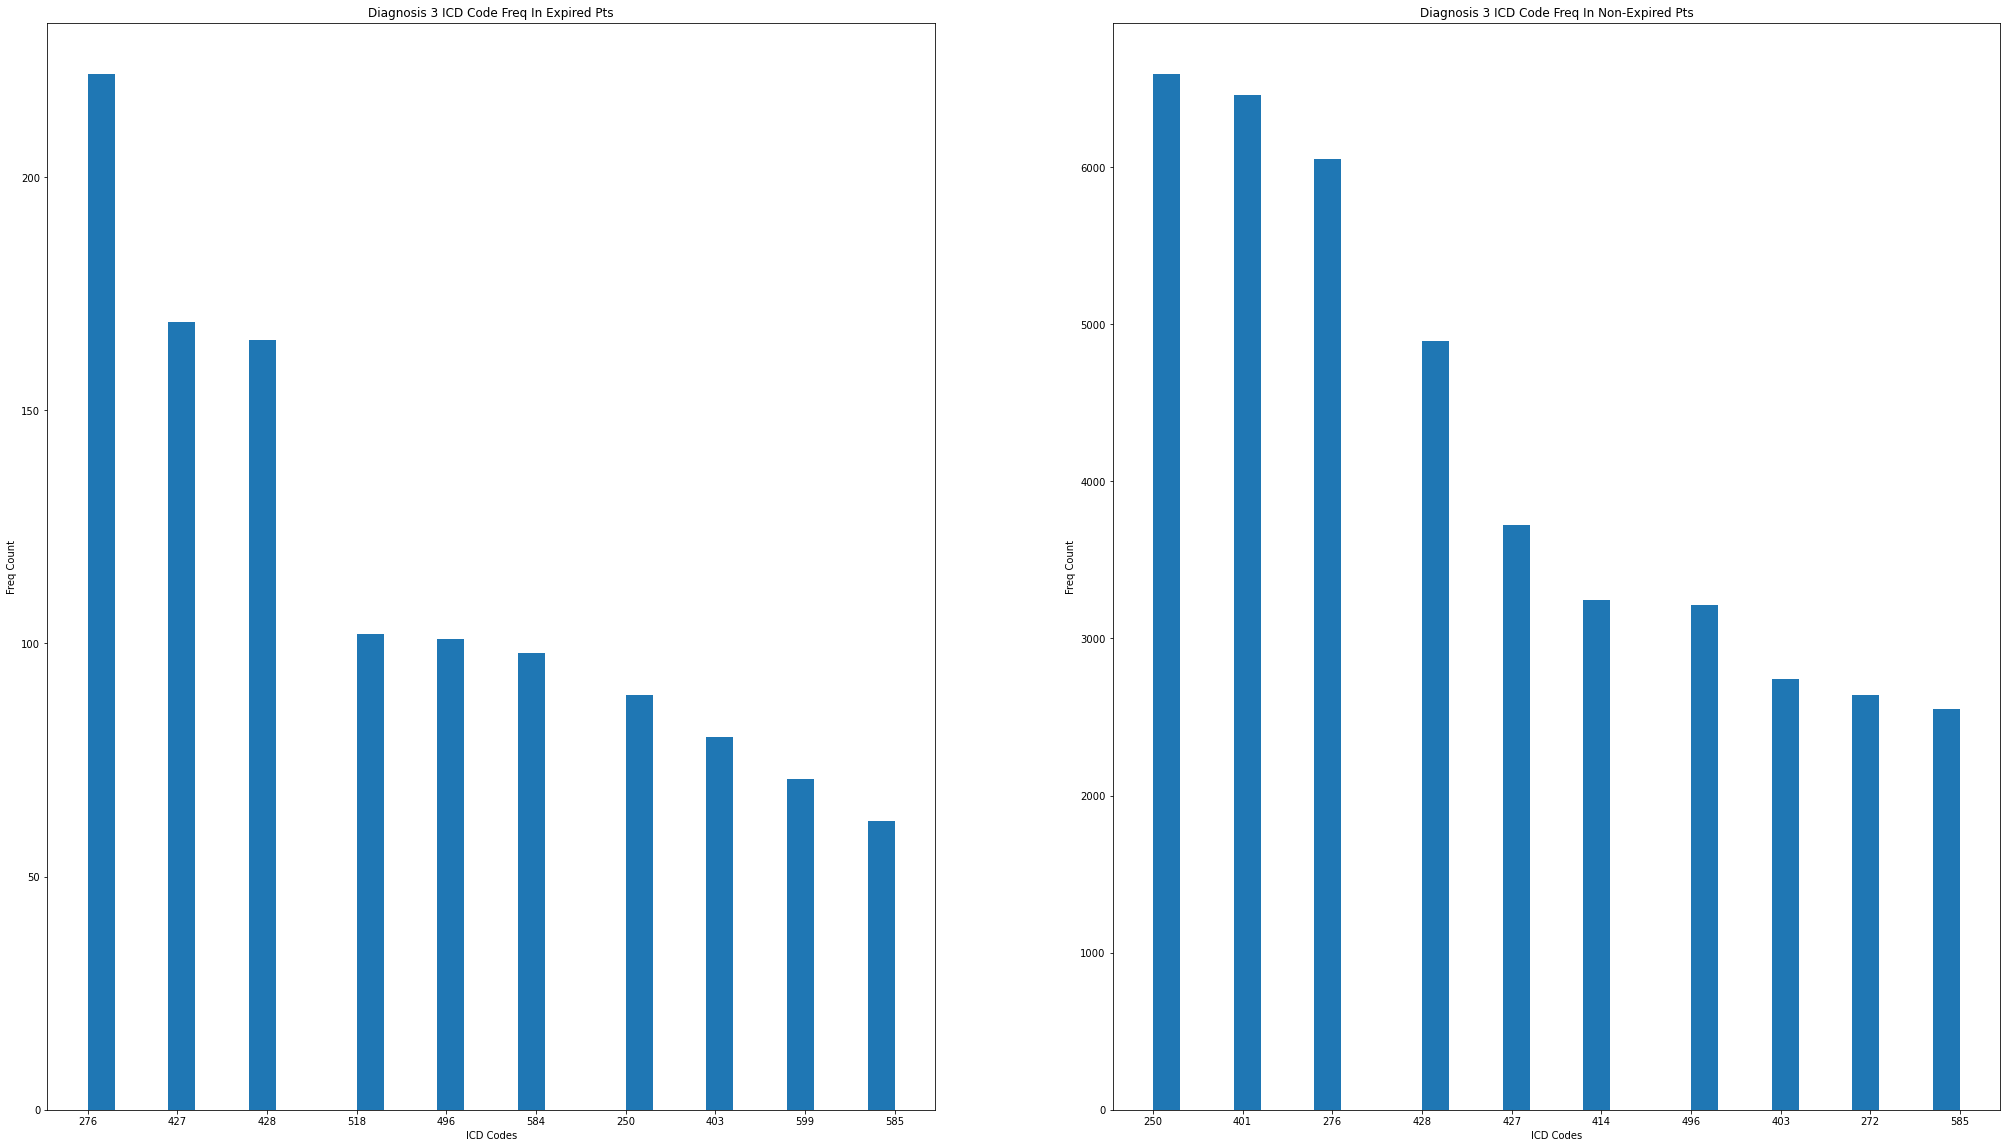

In [63]:
# Define the figure and create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(35, 20))

# Plot the first histogram on the first subplot
ax1.hist(diag3_counts_exp['icd9_expired'].head(10), weights=diag3_counts_exp['count'].head(10), bins=30)
ax1.set_title('Diagnosis 3 ICD Code Freq In Expired Pts')
ax1.set_xlabel('ICD Codes')
ax1.set_ylabel('Freq Count')

# Plot the second histogram on the second subplot
ax2.hist(diag3_counts_reg['icd9_nonexpired'].head(10), weights=diag2_counts_reg['count'].head(10), bins=30)
ax2.set_title('Diagnosis 3 ICD Code Freq In Non-Expired Pts')
ax2.set_xlabel('ICD Codes')
ax2.set_ylabel('Freq Count')

# Show the figure
plt.show()

In [64]:
#Concat both tables

diag3_concat = pd.concat([diag3_counts_reg, diag3_counts_exp], axis=1)
print(diag3_concat.head(20))

   icd9_nonexpired  count icd9_expired  count
0              250  11466          276  222.0
1              401   8241          427  169.0
2              276   4953          428  165.0
3              428   4412          518  102.0
4              427   3786          496  101.0
5              414   3635          584   98.0
6              496   2504          250   89.0
7              403   2277          403   80.0
8              272   1966          599   71.0
9              585   1930          585   62.0
10             599   1870          197   52.0
11             V45   1380          486   49.0
12          250.02   1338          401   48.0
13             707   1314          198   46.0
14             780   1309          707   46.0
15             285   1184          425   34.0
16             425   1102          785   33.0
17           250.6   1074       250.02   31.0
18             424   1036          414   29.0
19             305    919          162   28.0


Diagnosis 3 codes are different between the Expired and Non-Expired.

50% of the expired patients had these ICD9 codes above.

428 =  HF
 38 = Sepsis
 518=  Resp failure
 410= MI
 486 = Pnuemonia
 507 = Pneumonitis
 434 = Stroke
 197 = Lung Ca
 584 = Acute renal failure
 162 = Malignant neoplasm of trachea bronchus and lung
276 - Disorders of fluid, electrolyte, and acid-base balance
427 -  Cardiac dysrhythmias
 428 =  HF
 518=  Resp failure 
 496 = Chronic obstructive pulmonary disease and bronchiectasis
 584 = Acute renal failure
250 = Diabetes mellitus
 403 =Hypertensive chronic kidney disease
599  = Other disorders of urethra and urinary tract
585 = Chronic kidney disease (CKD)

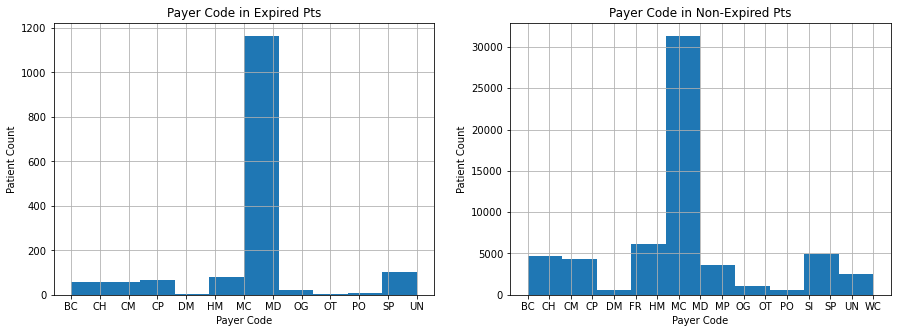

In [65]:
#Payer Code Feature in Both populations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

df_expired['payer_code'].sort_values().hist(ax=ax1)
ax1.set_title('Payer Code in Expired Pts')
ax1.set_xlabel('Payer Code')
ax1.set_ylabel('Patient Count')

df_nonexpired['payer_code'].sort_values().hist(ax=ax2)
ax2.set_title('Payer Code in Non-Expired Pts')
ax2.set_xlabel('Payer Code')
ax2.set_ylabel('Patient Count')
plt.show()

In [66]:
contingency_table = pd.crosstab(df_expired['payer_code'], df_nonexpired['payer_code'])

# Perform the chi-squared test and print the results
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic = {:.2f}".format(chi2))
print("p-value = {:.4f}".format(p))

Chi-squared statistic = 8.00
p-value = 0.2381


No significant difference in Payer code in both populations.  Most most expired patiens have Medicare and Medicaid. 

In [67]:
#Now we will look at Medical Specialty between the two populations.  First we have to summarize the information before we can graph it.

df_expiredMS = df_expired['medical_specialty'].value_counts().reset_index()
df_expiredMS = df_expiredMS.rename(columns={'index': 'att_service', 'medical_specialty': 'count'})

df_nonexpiredMS = df_nonexpired['medical_specialty'].value_counts().reset_index()
df_nonexpiredMS = df_nonexpiredMS.rename(columns={'index': 'att_service', 'medical_specialty': 'count'})

df_expiredMS = df_expiredMS.reset_index(drop=True)
df_nonexpiredMS = df_nonexpiredMS.reset_index(drop=True)

df_expiredMS.set_index('att_service', inplace=True)
df_nonexpiredMS.set_index('att_service', inplace=True)


Text(0, 0.5, 'Pt count')

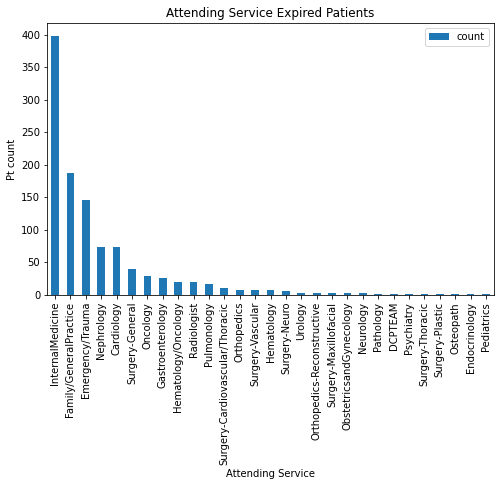

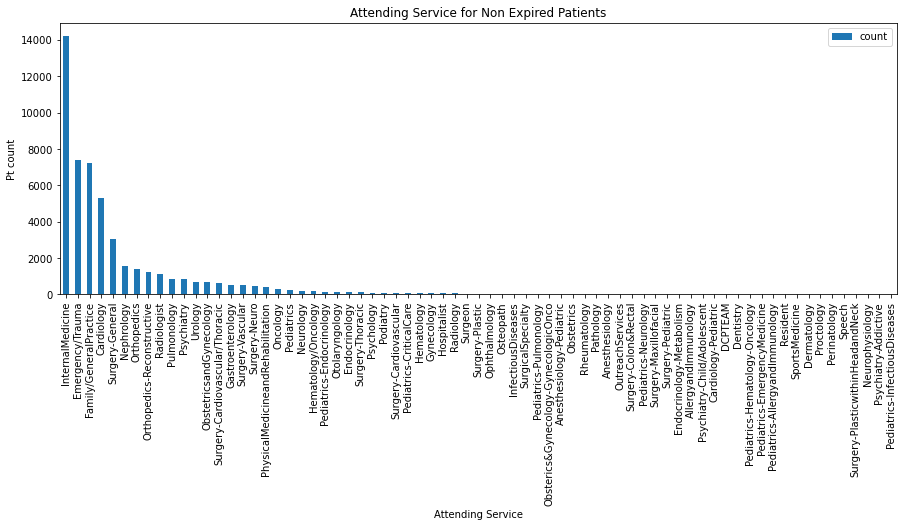

In [72]:
df_expiredMS.plot(kind='bar',y='count',figsize=(8, 5))
plt.title('Attending Service Expired Patients')
plt.xlabel('Attending Service')
plt.ylabel('Pt count')

df_nonexpiredMS.plot(kind='bar',y='count',figsize=(15, 5))
plt.title('Attending Service for Non Expired Patients')
plt.xlabel('Attending Service')
plt.ylabel('Pt count')

In [70]:
observed = df_expiredMS

pop_ratios = df_nonexpiredMS/len(df_nonexpiredMS)  # Get population ratios

expected = pop_ratios * len(df_expiredMS)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

count    17968.298497
dtype: float64


In [71]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 71) #72 total unique values for med specialty
print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=71)
print("P value")
print(p_value)

Critical value
91.67023917605484
P value
[0.]


Medical Specialty does differ between the two populations.  I added this for completeness sake but this feature has no added value in making predictions. 